In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns

In [2]:
from sklearn import datasets, metrics 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [3]:
cancer = datasets.load_breast_cancer()

In [4]:
cancer.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
X = cancer.data
y = cancer.target
X.shape, y.shape

((569, 30), (569,))

In [7]:
sum(y), len(y) - sum(y)

(np.int64(357), np.int64(212))

[Text(0, 0, '212'), Text(0, 0, '357')]

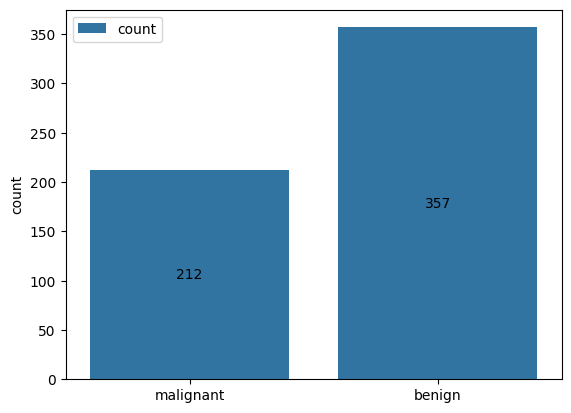

In [8]:
ax = sns.countplot(x = y, label = 'count')
plt.xticks(np.arange(2), cancer.target_names)
ax.bar_label(ax.containers[0], label_type = 'center')


In [9]:
df = pd.DataFrame(X, columns = cancer.feature_names)
df['class'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


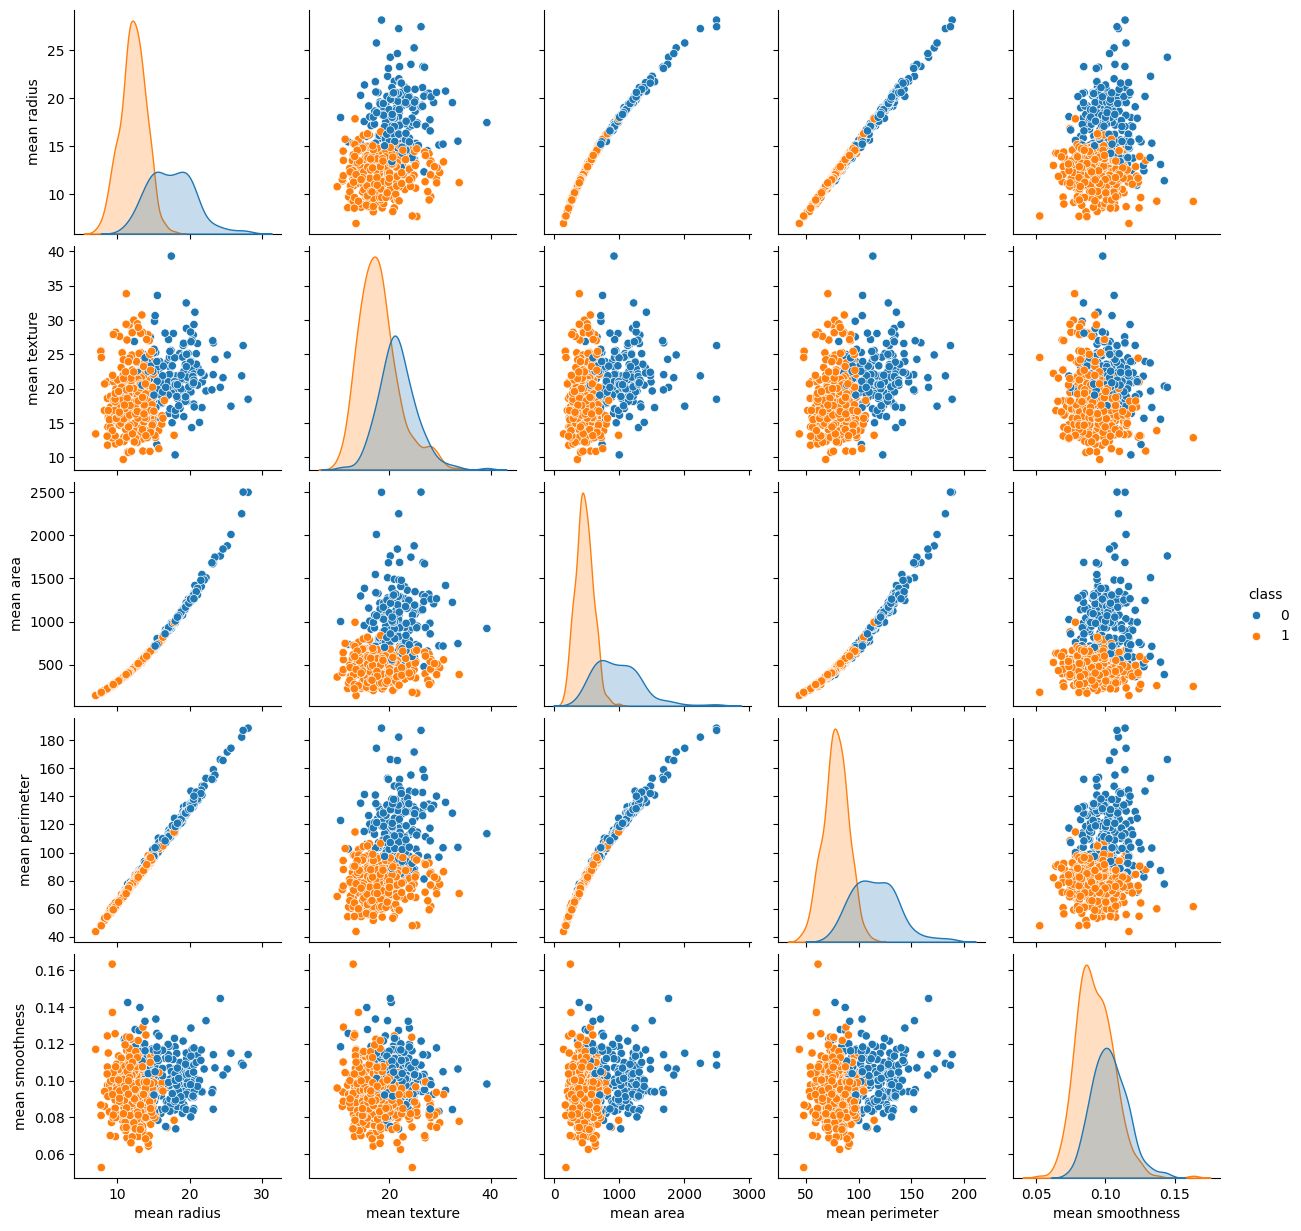

In [10]:
sns.pairplot(df, hue = 'class', vars = ['mean radius', 'mean texture', 'mean area',
'mean perimeter', 'mean smoothness'])

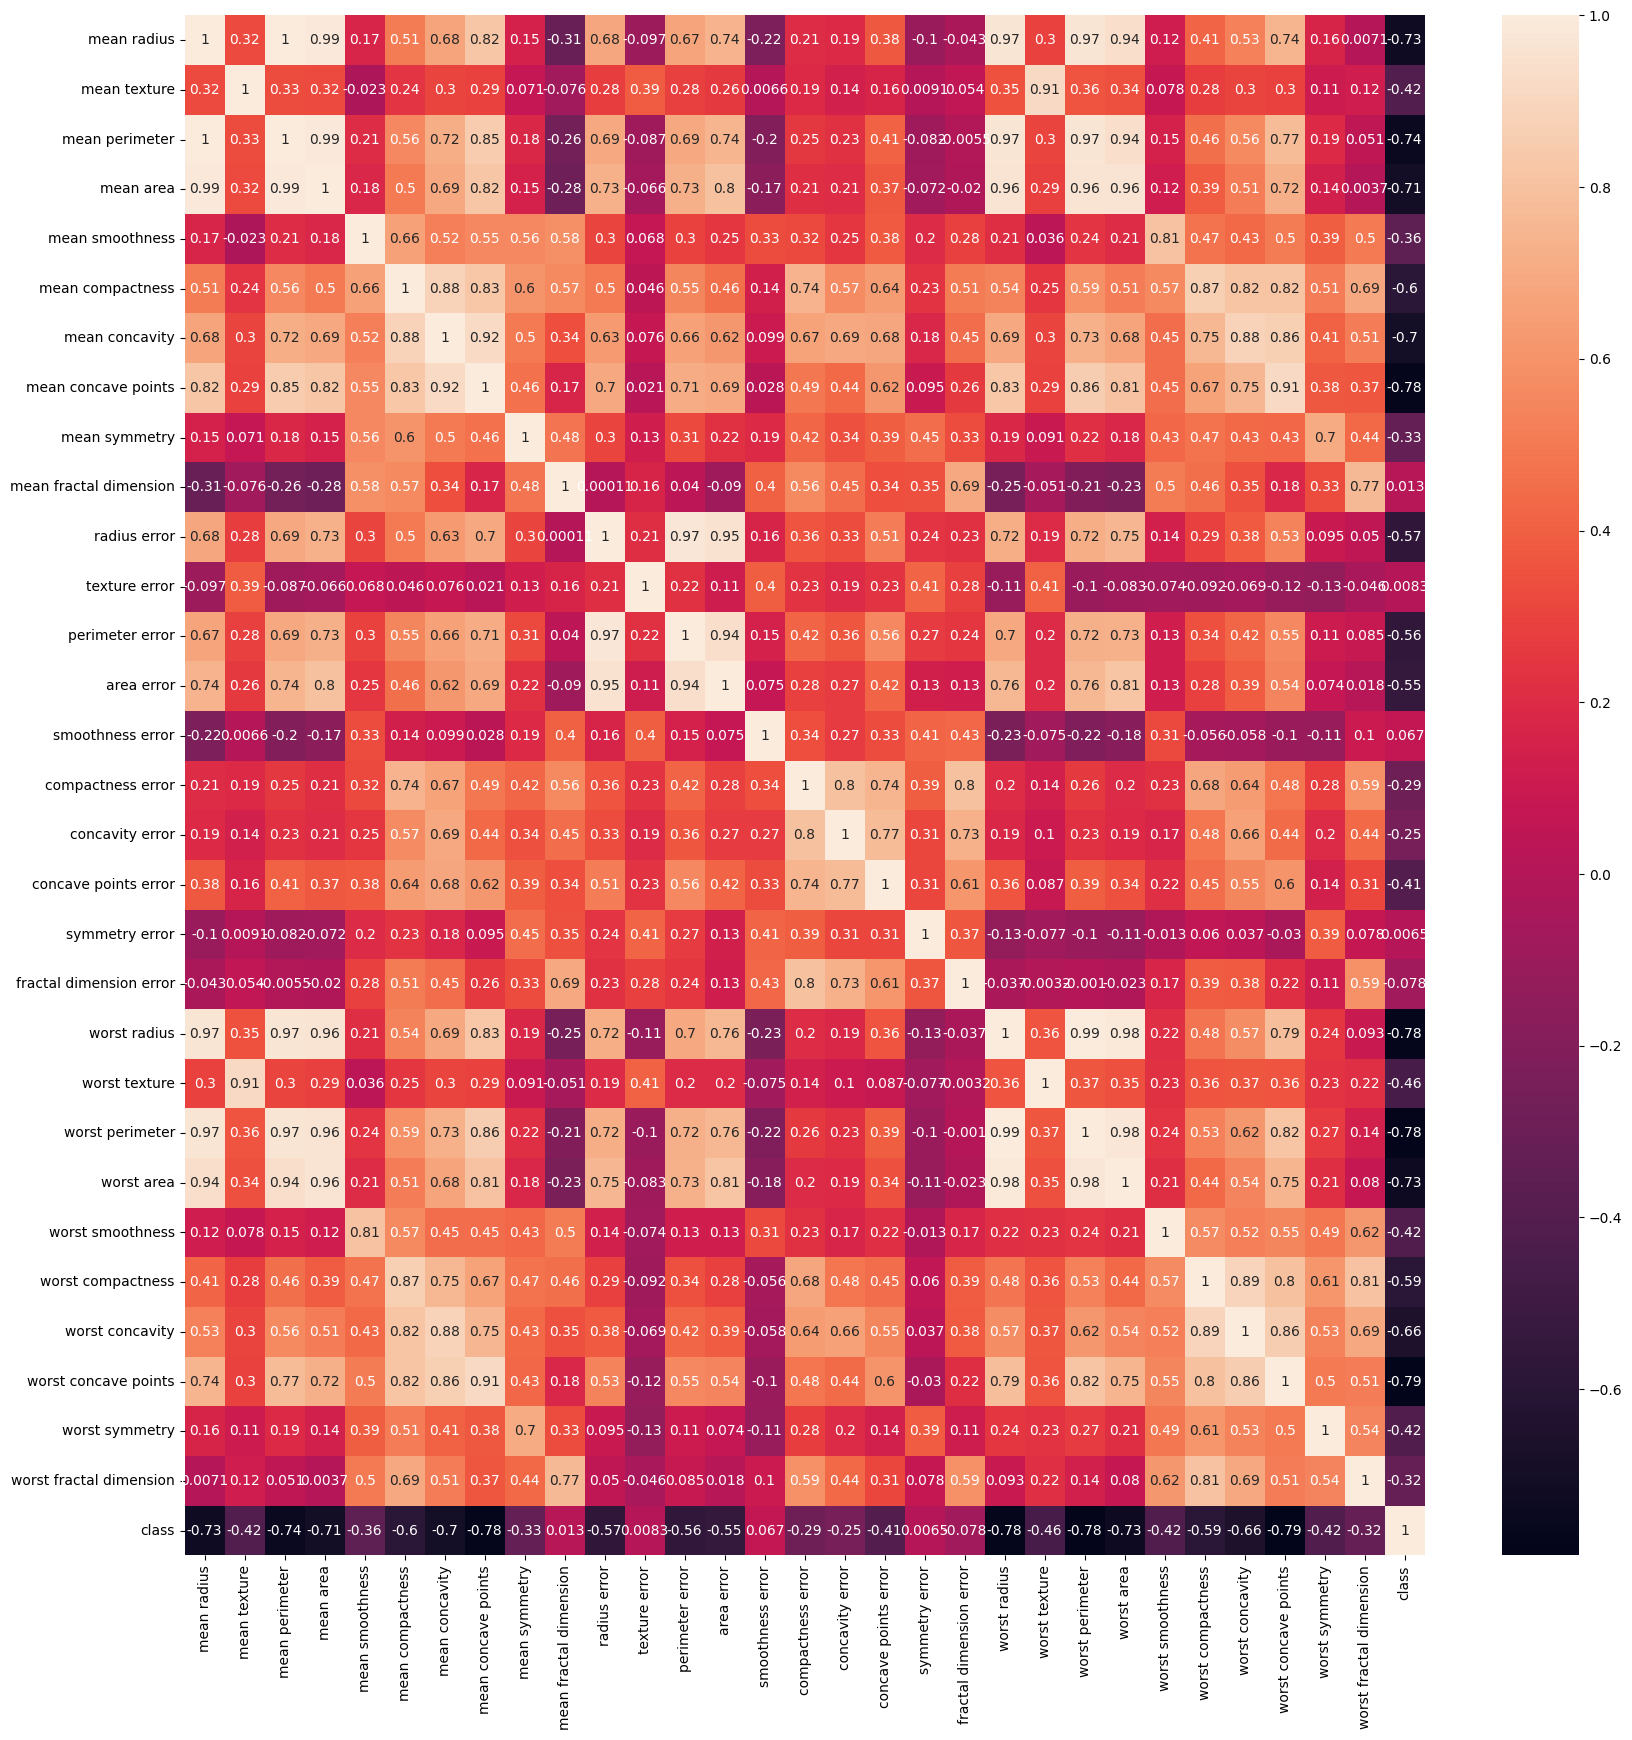

In [11]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.jpg')

<Axes: >

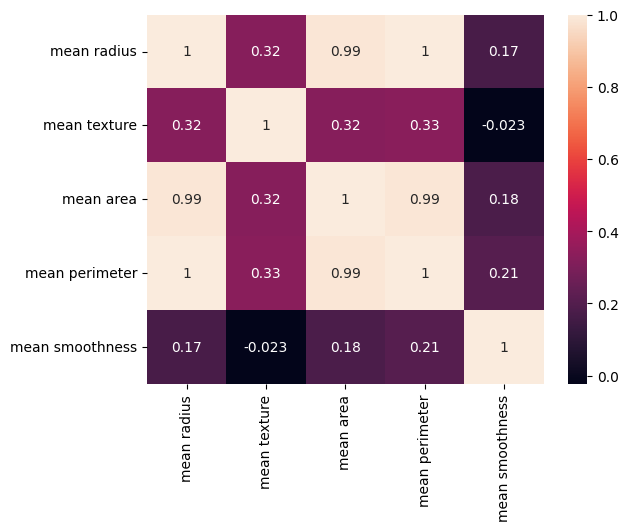

In [12]:
cols = ['mean radius', 'mean texture', 'mean area',
'mean perimeter', 'mean smoothness']

sns.heatmap(df[cols].corr(), annot = True)


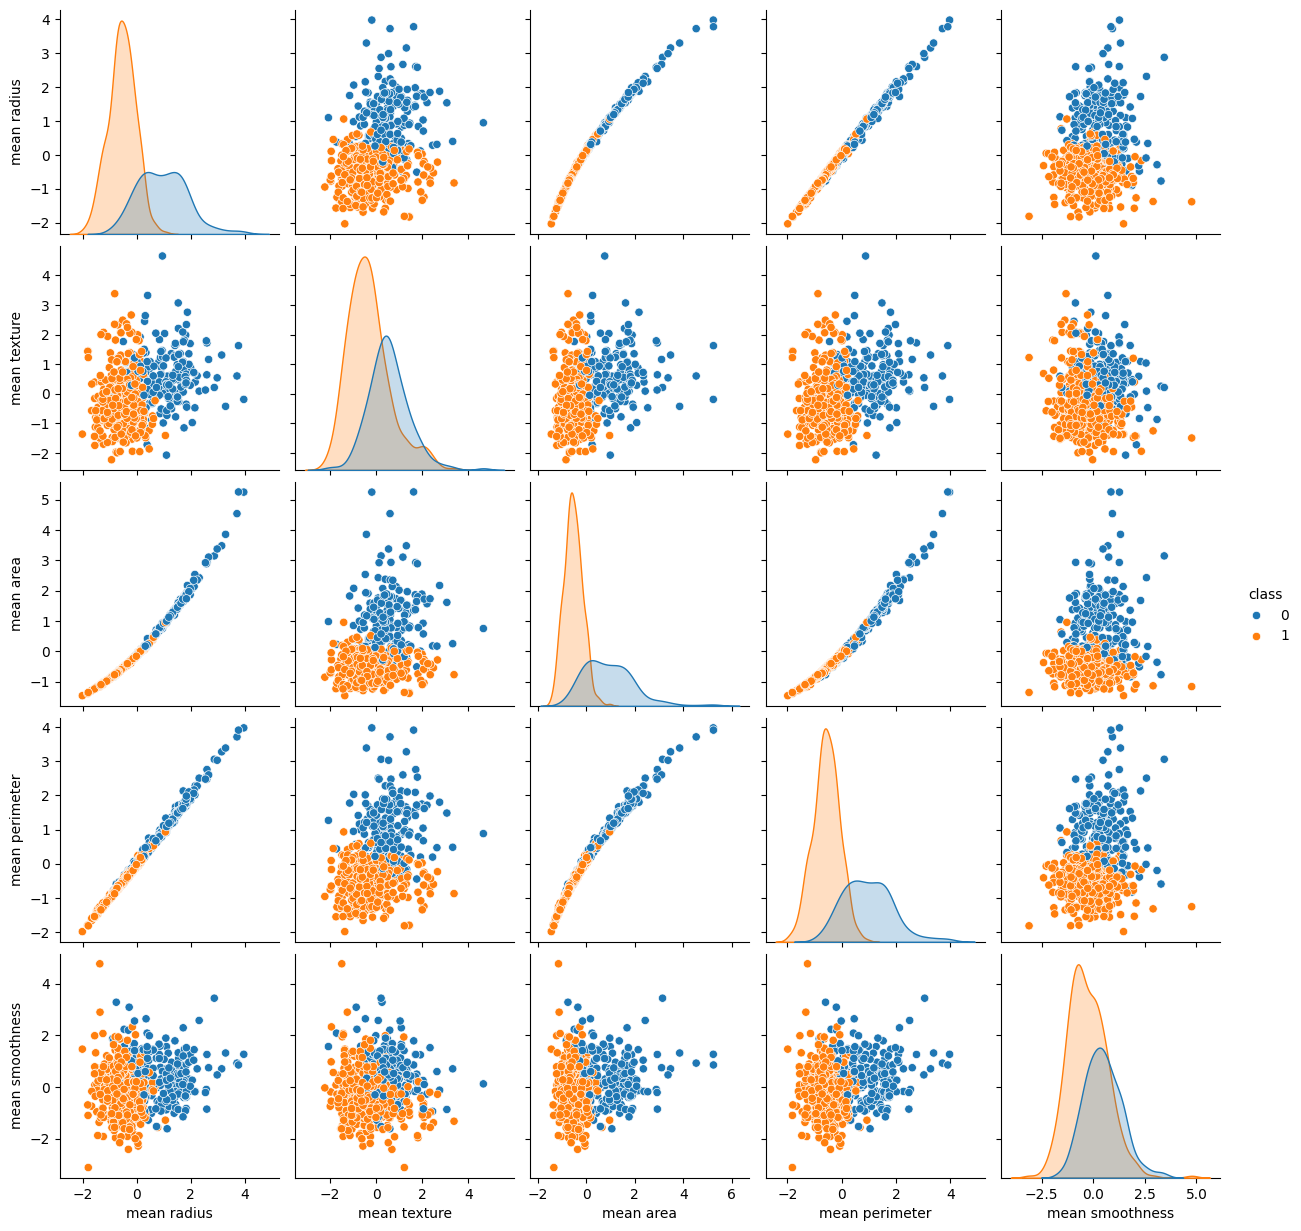

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_ = pd.DataFrame(X_scaled, columns = cancer.feature_names)

df_['class'] = cancer.target

sns.pairplot(df_, hue = 'class', vars = ['mean radius', 'mean texture', 'mean area',
'mean perimeter', 'mean smoothness'])

Using stratify is for putting same percent of each class in both train and test

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y , test_size = 0.2,
                                    random_state = 0, stratify= df['class'])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [47]:
from sklearn import svm


In [50]:
clf = svm.LinearSVC(dual = False, max_iter = 10000)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [54]:
print(metrics.classification_report(y_test, y_predict)) 

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [55]:
print(metrics.confusion_matrix(y_test, y_predict))

[[40  2]
 [ 1 71]]


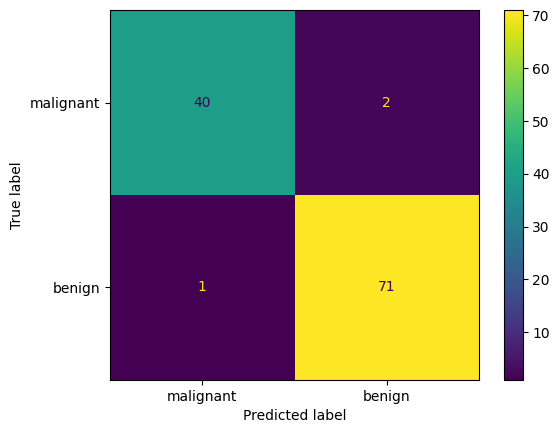

In [56]:
cm = metrics.confusion_matrix(y_test, y_predict)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels = cancer.target_names)
disp.plot()